In [192]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [193]:
import pandas as pd
import numpy as np
import 
canset=pd.read_csv('Reduced_Sample_Homework_Week6.csv')


In [194]:
canset.head()

,chcscncr,chcocncr,smoke100,smokday2,stopsmk2,lastsmk2,usenow3,ecigaret,ecignow,alcday5,...,potatoe1,vegetab2,exerany2,exract11,exeroft1,exerhmm1,exract21,exeroft2,exerhmm2,strength
0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,888.0,...,201.0,101.0,1.0,6.0,103.0,30.0,54.0,103.0,30.0,103.0
1,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,888.0,...,555.0,101.0,1.0,34.0,102.0,100.0,64.0,230.0,100.0,102.0
2,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,...,555.0,201.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0
3,1.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,888.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,1.0,3.0,NaN,1.0,3.0,2.0,NaN,888.0,...,201.0,303.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0


In [195]:
canset.drop(axis=1, labels=['exract11','exract21'], inplace=True) #Removing which type of activity variable, too many nulls

#### Changing labels 1 and 2 to 1 and 0, 1 being the positive label:

In [196]:
canset['chcscncr']=canset['chcscncr'].replace(2,0)  
canset['chcocncr']=canset['chcocncr'].replace(2,0)

In [197]:
canset.shape[0] #No. of records

450642

#### Replacing Unknown/dont know values to nan and then dropping the rows where target variable 'CHCSCNCR' = nan

In [198]:
canset['chcscncr'] = canset['chcscncr'].replace(7, np.nan)
canset['chcscncr'] = canset['chcscncr'].replace(9, np.nan)

canset['chcocncr'] = canset['chcocncr'].replace(7, np.nan)
canset['chcocncr'] = canset['chcocncr'].replace(9, np.nan)

canset = canset.dropna(axis=0, subset=['chcocncr'])
canset = canset.dropna(axis=0, subset=['chcscncr'])

#### Filling Nan and missing values with the mode of that variable

In [199]:
cols=list(canset.columns[2:]) #all columns except the target variables

In [200]:
for col in cols:
    canset[col] = canset[col].replace(888,0)
    canset[col] = canset[col].replace(88,0)
    canset[col] = canset[col].replace(777, np.nan)
    canset[col] = canset[col].replace(999, np.nan)
    canset[col] = canset[col].replace(77, np.nan)
    canset[col] = canset[col].replace(99, np.nan)
    if col!='lastsmk2':
        canset[col] = canset[col].replace(7, np.nan)

    canset[col] = canset[col].replace(9, np.nan)
    
    canset = canset.fillna(canset[col].mode()[0])

#### Changing per day, per week to per month:

In [201]:
filter1= (canset.alcday5 >= 101) & (canset.alcday5 <=107)
canset.loc[filter1, 'alcday5']=(canset.alcday5[filter1] - 100)*4     #changing day to per month
filter2= (canset.alcday5 >= 201) & (canset.alcday5 <=230)
canset.loc[filter2, 'alcday5']=(canset.alcday5[filter2] - 200)

In [202]:

cols2=['fruit2','fruitju2','fvgreen1','frenchf1','potatoe1','vegetab2']
for cols in cols2:
    filter1= (canset[cols] >= 101) & (canset[cols] <=199)
    canset.loc[filter1, cols]=(canset[cols][filter1] - 100)*30     #changing per day to per month
    filter2= (canset[cols] >= 201) & (canset[cols] <=299)
    canset.loc[filter2, cols]=(canset[cols][filter2] - 200)*4     #changing per week to per month
    filter3=(canset[cols] >= 301) & (canset[cols] <=399)
    canset.loc[filter3, cols]=(canset[cols][filter3] - 300)       #keeping per month as it is just removing 3__
    canset[cols] = canset[cols].replace(555,0)

    

#### Adding no. of hours in primary activity with other activity and dropping the other activity time:

In [203]:
canset.loc[:,'exerhmm1']=canset.exerhmm1 + canset.exerhmm2        
            

In [204]:
canset.drop(axis=1, labels=['exerhmm2'], inplace=True)

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [206]:
print(canset.shape)

(448560, 24)


#### Standardizing numerical values:

In [207]:
for col in list(canset.columns[9:]):
    canset[col]=(canset[col]-canset[col].mean())/canset[col].std()

In [208]:
X = canset.values[:,2:27]   #Independent variables
Y = canset.values[:,0]      #Dependent variable

#### Splitting in Testing and Training sets:

In [209]:
xtrain,xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.25, stratify=Y)

#### Fitting a decision tree classifier:

In [210]:
tree_clf = DecisionTreeClassifier(criterion= "gini", splitter='best', max_features=10) 
#tried the model with different no. of features and got very similar results
tree_clf.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Predicting the outcome of the test case:

In [211]:
prediction = tree_clf.predict(xtest)

#### Roc Curve

In [212]:
fpr, tpr, threshold = roc_curve(y_true=ytest, y_score=prediction, pos_label=1)

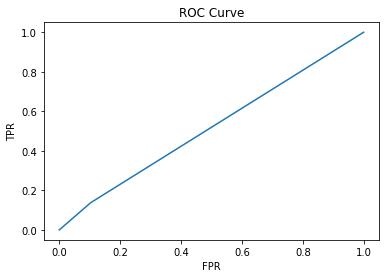

In [213]:
# Show curve

plt.clf()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

#### AUC:

In [221]:
roc_auc_score(ytest, prediction)

0.5

#### Using Logistic Regression:

In [215]:
log_clf= LogisticRegression()
rfe_o = RFE(log_clf,5)
fit_o = rfe_o.fit(xtrain,ytrain)

In [216]:
print(fit_o.n_features_)
print(fit_o.support_)
print(fit_o.ranking_)

5
[ True  True False  True False  True False False False False  True False
 False False False False False False False False False False]
[ 1  1  8  1  3  1  4  2  5 13  1 14 11 18 17 16 15 10  9 12  6  7]


#### Predicting on Test set:

In [217]:
prediction = fit_o.predict(xtest)

#### ROC Curve:

In [218]:
#ROC Curve
fpr, tpr, threshold = roc_curve(y_true=ytest, y_score=prediction, pos_label=1)

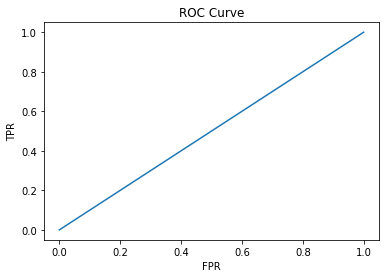

In [219]:
# Show curve
plt.clf()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

#### AUC:

In [220]:
roc_auc_score(ytest, prediction)

0.5

#### As the auc value for both decision tree classifier as well as logistic regression is around 0.5, we can say that the data features have no effect on the target variable, i.e. Chcscncr